In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Dataset is missing its header - so colnames were retrieved from https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

It's unclear what the decision column is, and it's not mentioned in the data dictionary on Kaggle, so might have been included by mistake. I think it makes sense to have safety as a target variable for classification. I'm removing the decision and proceeding with the 6 columns defined on Kaggle.

In [21]:
columns = ['buying_price', 'maintainance_cost', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
df = pd.read_csv('car_evaluation.csv', names=columns).drop('decision', axis=1)
df.head()

,buying_price,maintainance_cost,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [22]:
X_train.dtypes

buying_price         object
maintainance_cost    object
doors                object
persons              object
lug_boot             object
dtype: object

We need to do something with the categorical variables before we can apply random forest

In [24]:
encoder = OneHotEncoder()
encoded_df = encoder.fit_transform(df.iloc[:,:-1], df.iloc[:,-1])
encoded_df

<1728x18 sparse matrix of type '<class 'numpy.float64'>'
	with 8640 stored elements in Compressed Sparse Row format>

We need to get the names of the features so we can use them later in the graph

In [35]:
x_names = encoder.get_feature_names_out()
x_names

array(['buying_price_high', 'buying_price_low', 'buying_price_med',
       'buying_price_vhigh', 'maintainance_cost_high',
       'maintainance_cost_low', 'maintainance_cost_med',
       'maintainance_cost_vhigh', 'doors_2', 'doors_3', 'doors_4',
       'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small'], dtype=object)

The encoded df is just the X variables, so we pass that directly, and use the y from the original df

In [30]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, df.iloc[:,-1], test_size = 0.2, random_state = 495)


In [32]:
X_train

<1382x18 sparse matrix of type '<class 'numpy.float64'>'
	with 6910 stored elements in Compressed Sparse Row format>

In [33]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
clf.feature_importances_

array([0.05557961, 0.05345512, 0.05589283, 0.05605644, 0.05541027,
       0.05983236, 0.05575551, 0.05318655, 0.05432856, 0.05161157,
       0.05027858, 0.05289494, 0.06034695, 0.06017809, 0.0603045 ,
       0.05814227, 0.05449356, 0.05225228])

In [36]:
feature_imp = pd.Series(clf.feature_importances_, index=x_names).sort_values(ascending=False)
feature_imp

persons_2                  0.060347
persons_more               0.060304
persons_4                  0.060178
maintainance_cost_low      0.059832
lug_boot_big               0.058142
buying_price_vhigh         0.056056
buying_price_med           0.055893
maintainance_cost_med      0.055756
buying_price_high          0.055580
maintainance_cost_high     0.055410
lug_boot_med               0.054494
doors_2                    0.054329
buying_price_low           0.053455
maintainance_cost_vhigh    0.053187
doors_5more                0.052895
lug_boot_small             0.052252
doors_3                    0.051612
doors_4                    0.050279
dtype: float64

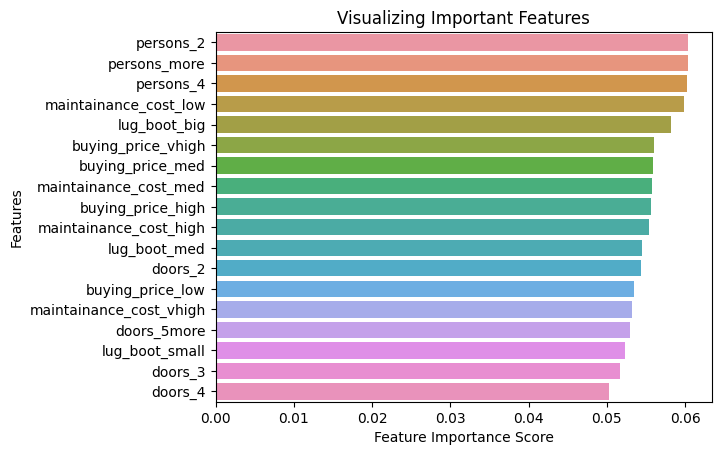

In [37]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()